## Homework 2 

### Part I - Visual Data Analytics (50 pts)

In this part, you are given a seed characteristics dataset. The dataset file is slightly modified and included in the zip file for easier reading (please put it in the same directory as this notebook file). The dataset includes measurements of geometrical properties of kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian (which are represented with group feature). For each group you have 70 instances each. You can find the information about the dataset (here)[info about the dataset https://archive.ics.uci.edu/ml/datasets/seeds ]. Answer the seven questions provided below. Provide your remarks as comments.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./seeds_dataset.csv', sep='\t') # info about the dataset https://archive.ics.uci.edu/ml/datasets/seeds
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   kernel_length         210 non-null    float64
 4   kernel_width          210 non-null    float64
 5   asymmetry_coef        210 non-null    float64
 6   kernel_groove_length  210 non-null    float64
 7   group                 210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


#### Q1 [3 pts] - Create a new parameter 'kgl' for discretizing the 'kernel_groove_length' feature, which can take the values 'high' and 'low'. 
If kernel_groove_length is greater than 5.50, then set 'kgl' to 'high' else, set it to 'low. 

In [3]:
# your answer

#setting threshold
a = 5.50 

#creating parameter
df['kgl'] = pd.cut(x=df['kernel_groove_length'],
                  bins=[0, 5.50,10],
                  labels = ["Low","High"])

df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,group,kgl
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Low
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Low
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Low
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Low
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Low
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,Low
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,Low
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,Low
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,Low


#### Q2 [5 pts] - Create an equiwidth histogram for the area feature width 20 bins.  
Color the bars based on 'kgl' attribute you created in Q1. Use stacking or layered bars to identify which area values have high and low kgl levels.

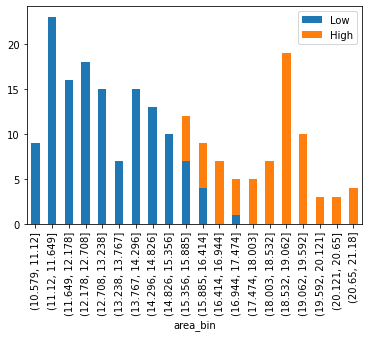

In [4]:
# your answer goes here
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter


#plt.hist(df['area'], bins = 20, edgecolor = 'black')
#plt.xlabel('Area')

df['area_bin'] = pd.cut(df['area'], bins=20)
df.groupby('area_bin')['kgl'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.show()


#### Q3 [8 pts] -- Create an equi-frequency histogram plot for 'perimeter' feature using 20 bins. 
Make sure you display the density values and not counts. How is the 'perimeter' feature's values are distributed in this dataset? Identify a candidate probability distribution.

Text(0, 0.5, 'Density')

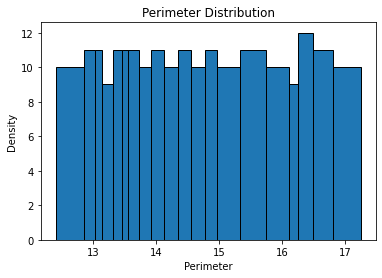

In [5]:
# your answer goes here

#function to calculate equal-frequency bins
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))
#create histogram 
n, bins, patches= plt.hist(df['perimeter'], 
                            equalObs(df['perimeter'], 20), 
                            edgecolor='black')

plt.title('Perimeter Distribution')
plt.xlabel('Perimeter')
plt.ylabel('Density')

#The 'perimeter' feature's value are uniformly distributed 

#### Q4 [8 pts] -- Perform a subgroup analysis by visualizing the 'compactness' and 'kgl' features with violinplots. 
Create a set of violinplots for compactness feature for each group (target feature). Violin plots are similar to box plots, but they show the probability density of the data at different values (See [the documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html)). Split the data using 'kgl' feature. Finally, provide your remarks whether 'kgl' and 'compactness' can be used for predicting the 'group' variable.

<AxesSubplot:xlabel='group', ylabel='compactness'>

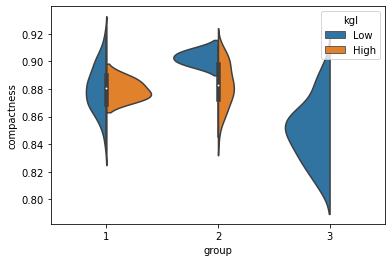

In [6]:
# your answer goes here

sns.violinplot(data=df, x="group", y="compactness", 
               hue="kgl",split = True)


#For all the groups, the overall shape and distribution of the tips are very different 
#for both 'kgl' levels. For group 1 and 3, the higher concentration of low values follows 
#close to a normal distribution. For group 1, the concentration of high values follows a 
#uniform distribution, and group 2 it follows a normal distribution.  
#Based on the displayed distributiond from the violinplots, 
#I believe'kgl' and 'compactness' can be used for predicting the'group' variable


#### Q5 [8 pts] -- Create a boxplot for asymmetry_coef parameter. 
However, to depict the potential outliers clearly, instead of using (Q1-1.5IQR, Q3+1.5IQR) use only top 5% (interval of 0 to 95 percentile) for placing your whiskers. Identify the potential outlying points thresholds for each group for asymmetry_coef parameter.

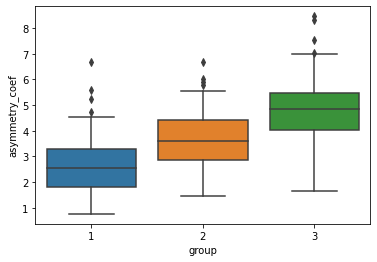

In [7]:
# your answer goes here
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#sboxplot = df.boxplot(by=df['group'], column=df['asymmetry_coef'], whis=[0,95])  

sns.boxplot(x=df['group'], y=df['asymmetry_coef'], whis =[0,95])
plt.show()

#Potential Outlying points thresholds for each group 
#Group1: the outlying threshold for group1 can be set as anything above 4.50
#Group2: the outlying threshold for group2 can be set as anything above 5.50
#Group3: the outlying threshold for group3 can be set as anything above 7.00



#### Q6 [8 pts] - Analyze the relationship between kernel length and kernel width parameter. 
Create a scatter plot (use length and width values for x and y axis), use different colors for instances from different groups. 

What can you say about the relationship amoung kernel length, kernel width and group features. 


<AxesSubplot:xlabel='kernel_length', ylabel='kernel_width'>

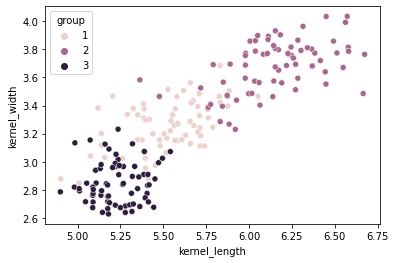

In [8]:
# your answer goes here
#plt.scatter(x = df['kernel_length'], y = df['kernel_width'], hue=df['group'])
#plt.xlabel("Kernel Length")
#plt.ylabel("Kernel Wedth")
#plt.legend(df["group"])
#plt.show()


sns.scatterplot(x=df['kernel_length'], y=df['kernel_width'], 
                hue=df['group'])

#Kernel length and kernel width relates to the group features. Instances with low kernel width and low kernel length
#tend to be in mostly group 3, instances with kernel length around [5.30-5.80] and kernel width[3.2-3.6] seem to be mostly 
#in group 1, and otherwise it most of the instances instances belong to group 2. Also the higher the length and width the more
#spread out the cluster of spots seem to get. 


#### Q7 [10pts] - Create a star plot for average kernel length, kernel width, perimeter, compactness and area features from each group. 
Each star represents mean kernel length/width, perimeter, compactness and area for one group. 

Which feature's mean value can separate the groups better?  

In [9]:
# your answer goes here
import plotly.graph_objects as go
import plotly.offline as pyo

categories = ['kernel_length', 'kernel_width', 'perimeter', 'compactness', 'area']


#dividing the TF into groups 
group1= pd.DataFrame()
group2= pd.DataFrame()
group3= pd.DataFrame() 

group1 = df[df.group == 1]
group2 = df[df.group == 2]
group3 = df[df.group == 3]

#Building the scatterplots 
fig = go.Figure(
    data=[
        go.Scatterpolar(r=pd.Series(group1[categories].mean()), theta=categories, fill='toself', name='Group 1'),
        go.Scatterpolar(r=pd.Series(group2[categories].mean()), theta=categories, fill='toself', name='Group 2'),
        go.Scatterpolar(r=pd.Series(group3[categories].mean()), theta=categories, fill='toself', name='Group 3')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Group comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)

#Since the area feature, shows a higher difference in the groups, 
#I believe it'll be the best feature to separate the groups by 


'temp-plot.html'

### Part II - Analyzing Boosting Tree Ensembles (60 pts)

Boosting is a type of ensemble methods that combines the predictions from many base (or weak) learners sequentially. A base learner in this case is often a simple model (in our case, a decision tree classifiers). Adaptive Boosting (AdaBoost) algorithm is one of the well-known boosting methods, which involves using relatively small trees sequentially trained. Consecutive models attempt to refine and correct the predictions made by the previous model by weighing the training dataset and assigning more importance on training instances which the prior model made prediction errors.

You will again use the seeds dataset from Part I. Please read it again using the following code snippet and answer the questions.

In [10]:
desc_features = ['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 
                 'asymmetry_coef', 'kernel_groove_length']
target_feature = 'group'
target_levels = ['Kama', 'Rosa', 'Canadian']

df = pd.read_csv('./seeds_dataset.csv', sep='\t') # info about the dataset https://archive.ics.uci.edu/ml/datasets/seeds

print(desc_features)
df.head()
#df.info()

['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width', 'asymmetry_coef', 'kernel_groove_length']


,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,group
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


#### Q1 [5 pts] - Create training and testing datasets.
Use the DataFrame created above from `seeds` dataset. You can use `train_test_split` from `sklearn.model_selection`.  The `random_state` parameter in `train_test_split` should be set to your panther id number's last two digits and the training set should have 3 times more instances than the testing set (i.e., 75%-25% split).

In [11]:
# your answer goes here
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#X = df.drop('group', axis=1)
#y = df['group']

X_train, X_test, Y_train, Y_test = train_test_split(df[desc_features], df['group'],
                                                    test_size=0.25, random_state=54)
print(X_test, Y_test)

      area  perimeter  compactness  kernel_length  kernel_width  \
33   13.94      14.17       0.8728          5.585         3.150   
203  12.70      13.41       0.8874          5.183         3.091   
89   20.88      17.05       0.9031          6.450         4.032   
188  11.23      12.82       0.8594          5.089         2.821   
195  12.80      13.47       0.8860          5.160         3.126   
71   16.84      15.67       0.8623          5.998         3.484   
122  16.17      15.38       0.8588          5.762         3.387   
170  11.02      13.00       0.8189          5.325         2.701   
12   13.89      14.02       0.8880          5.439         3.199   
11   14.03      14.16       0.8796          5.438         3.201   
180  11.41      12.95       0.8560          5.090         2.775   
175  10.80      12.57       0.8590          4.981         2.821   
127  17.98      15.85       0.8993          5.979         3.687   
148  12.70      13.71       0.8491          5.386         2.91

#### Q2 [15 pts] - Training and testing a simple decision tree model
Using sklearn's decision tree classifier (`DecisionTreeClassifier`), initialize a tree-based classification model. Set the max_depth to 2. Then, train and test the error rate of your classifier. Also, include the confusion matrix and the error rate for your classifier.

In [12]:
# your answer goes here

#initialize a tree-based classification model
dt_clf = DecisionTreeClassifier(max_depth = 2, criterion='entropy', random_state = 54)

#train the model
dt_clf.fit(X_train, Y_train)

#test the model 
y_pred = dt_clf.predict(X_test)
y_pred



array([1, 3, 2, 3, 3, 2, 2, 3, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 3,
       1, 2, 3, 3, 1, 2, 1, 3, 3, 1, 3, 1, 1, 1, 3, 2, 3, 1, 3, 1, 3, 2,
       2, 3, 2, 3, 3, 1, 1, 2, 2])

In [13]:
# Check the error rate
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(Y_test, y_pred)
accuracy1

0.9433962264150944

In [14]:
#Check the confusion metrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

cm_df = pd.DataFrame(cm)
cm_df

,0,1,2
0,14,0,2
1,1,13,0
2,0,0,23


#### Q3 [10 pts] - Visualize the trained decision tree and interpret the feature importance
Visualize the decision tree and identify the most informative feature in your training set (with the highest information gain). 

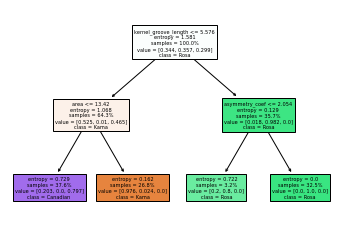

In [15]:
# your answer goes here
from sklearn import tree
ax=tree.plot_tree(dt_clf, feature_names=desc_features, class_names=target_levels, 
               filled=True, proportion='True')

#The most informative feature is 'kernel_groove_length'. 
#Since it has the highest information gain, it was selected to be the root node. 

#### Q4 [15 pts] - Create a boosting ensemble.
Using the `AdaBoostClassifier` from `sklearn.ensemble`, build a boosting ensemble. Boosting ensemble starts with a simple learning model, often a decision tree, and progressively updates the weights of the training instances to better predict the misclassified instances in previous iterations.

You are expected to use `DecisionTreeClassifier` (see `base_estimator` parameter in [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)) as your base estimator, with `max_depth` set to 2 as in the case of Q2. Use 4 estimators (`n_estimators=4`). 

After training and obtaining the error rate for your AdaBoost ensemble, evaluate the testing accuracy (or error rate). Note that you need to train and test using the same samples from Q1 and Q2. Compare your results with the accuracy scores from Q2.

In [16]:
# your answer goes here
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators = 4, base_estimator=DecisionTreeClassifier(max_depth = 2, 
                                                               criterion='entropy',                                                                random_state = 54))
clf

#Train the model
clf.fit(X_train, Y_train)

#test the model
y_pred = clf.predict(X_test)
y_pred


array([1, 3, 2, 3, 3, 2, 2, 3, 1, 1, 3, 3, 2, 1, 3, 3, 3, 3, 2, 3, 1, 3,
       1, 2, 3, 3, 1, 2, 1, 3, 3, 1, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2,
       2, 3, 2, 3, 3, 1, 1, 1, 2])

In [17]:
# Check the error rate
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(Y_test, y_pred)
accuracy2

#The accuracy score from Q2 is higher than Q4
print("Q2 accuracy score: ", accuracy1)
print("Q4 accuracy score: ", accuracy2)


Q2 accuracy score:  0.9433962264150944
Q4 accuracy score:  0.9245283018867925


#### Q5 [15 pts] - Visualize the boosted trees
Visualize the individual estimators (base learners) in the AdaBoost classifier you have trained in Q4. Identify the similarities between the first estimator (the initially trained one in the ensemble) and the one you trained in Q2 (and visualized in Q3). How do the subsequent learners change? Which features are given more importance in the subsequent iterations? 

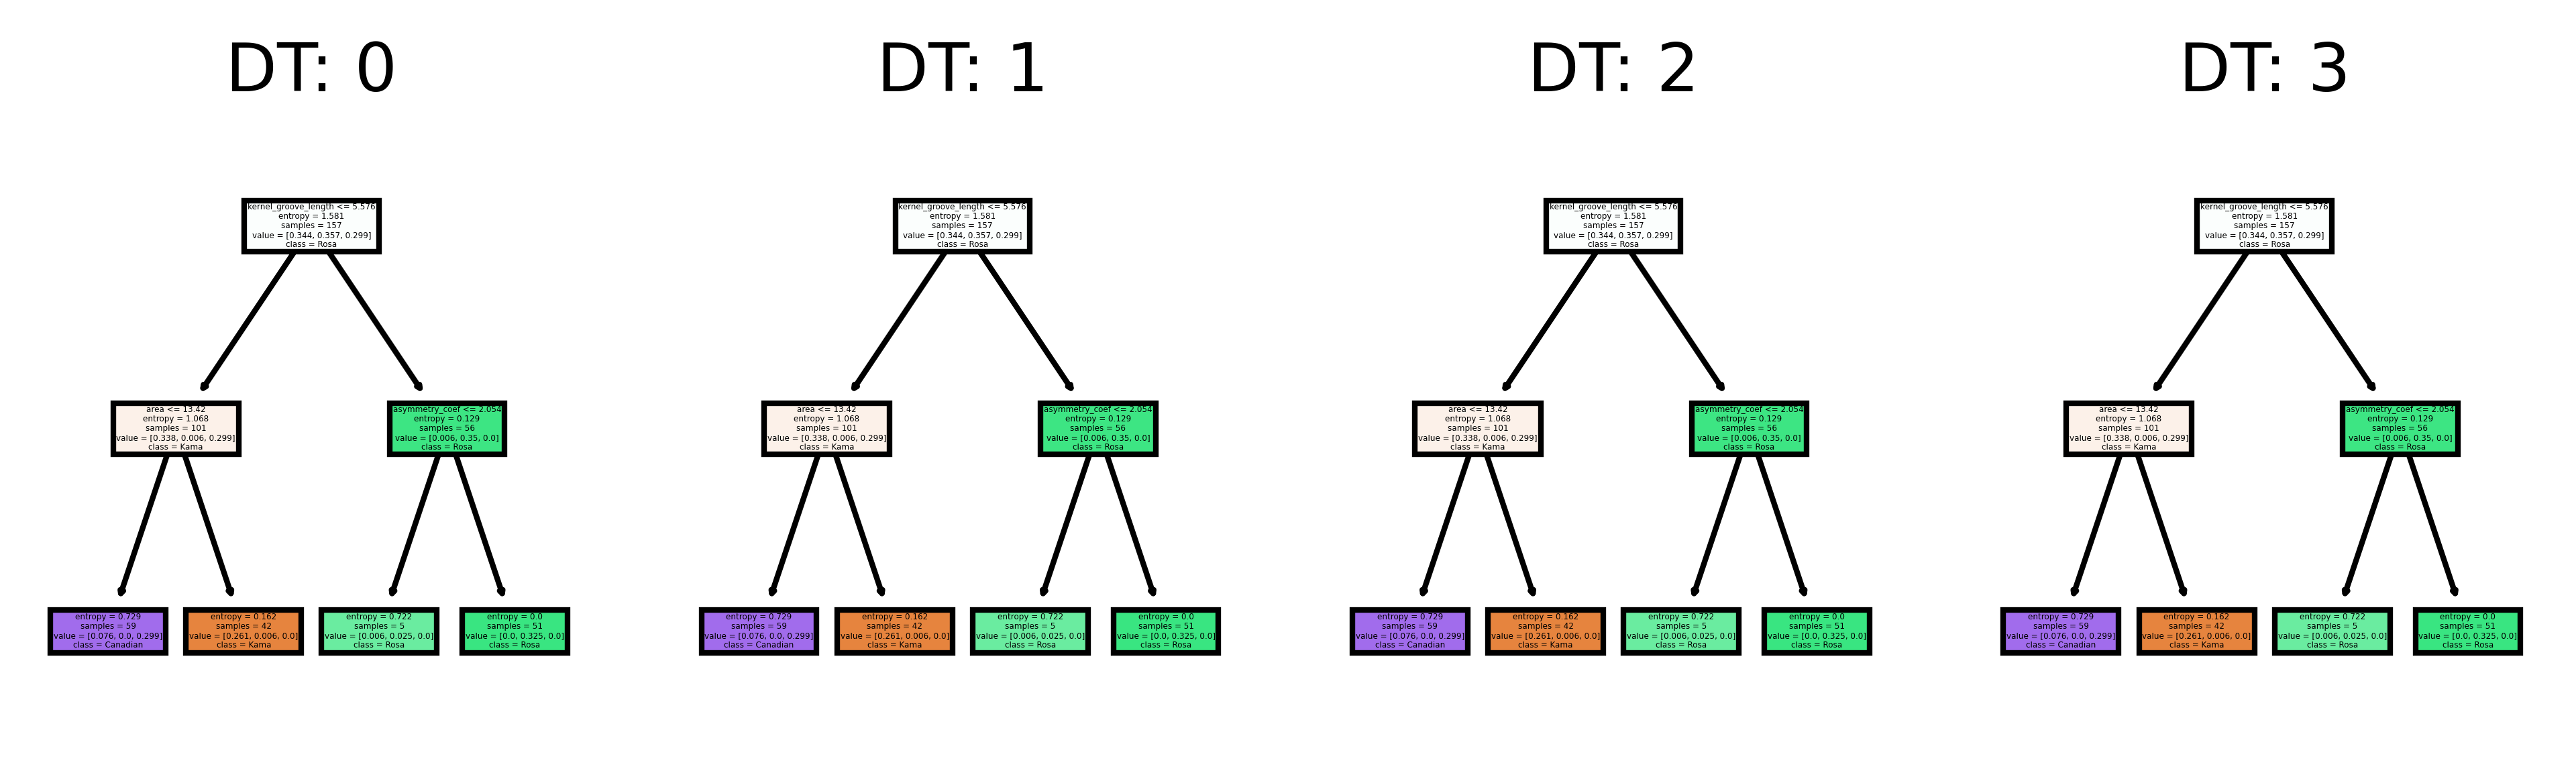

In [18]:
# your answer goes here
fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = (8,2), dpi=600)
for i in range(4):
    tree.plot_tree(clf.estimators_[0],
                   feature_names = desc_features, 
                   class_names=target_levels,
                   filled = True, 
                   ax = axes[i])
    axes[i].set_title('DT: ' + str(i), fontsize = 12)
    
#The main similarity is that both trees from Q2 and Q5 is that they both split by the same features. 
#However, for Q5 the numbers for each entropy and value are different and smaller because the trees in the 
#ensemble are training on a smaller samples of the dataset. 
#The features that are given more importance are 'kernel_groove_length', 'area', and 'asymmetry_coef' 
